In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression

In [2]:
heart_data = pd.read_csv('./heart.csv')

In [3]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_data.shape

(918, 12)

In [5]:
heart_data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [6]:
heart_data["HeartDisease"].describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [7]:
heart_data["HeartDisease"].unique()

array([0, 1], dtype=int64)

# Check correlation between columns

In [8]:
print(heart_data.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease    1.000000
Oldpeak         0.403951
MaxHR           0.400421
Age             0.282039
FastingBS       0.267291
Cholesterol     0.232741
RestingBP       0.107589
Name: HeartDisease, dtype: float64


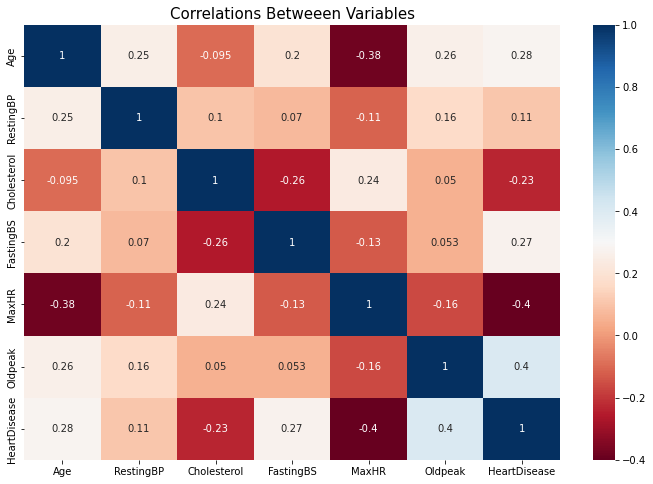

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=15)
plt.show()

In [10]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
heart_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# DATA VISUALIZATION

In [12]:
heart_data["HeartDisease"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

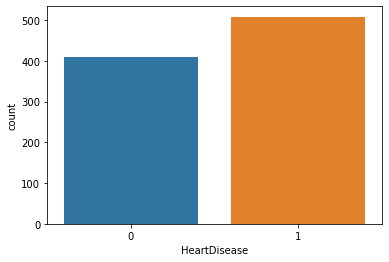

In [13]:
y = heart_data["HeartDisease"]
sns.countplot(y)

In [14]:
heart_data["Age"].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Count'>

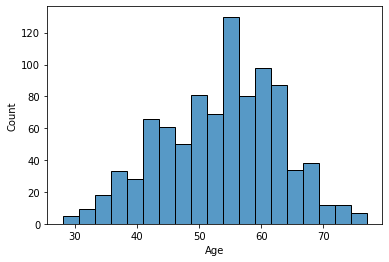

In [15]:
sns.histplot(heart_data["Age"])

In [16]:
heart_data["Sex"].unique()


array(['M', 'F'], dtype=object)

Text(0.5, 1.0, 'Sex')

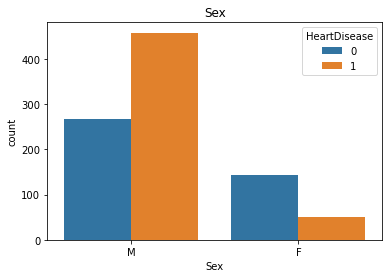

In [17]:
plt.figure()
sns.countplot(x = "Sex", data = heart_data, hue = "HeartDisease")
plt.title("Sex")

In [18]:
heart_data["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Text(0.5, 1.0, 'ChestPainType')

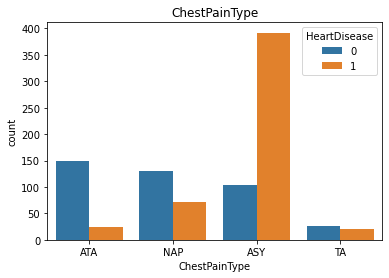

In [19]:
plt.figure()
sns.countplot(x = "ChestPainType", data = heart_data, hue = "HeartDisease")
plt.title("ChestPainType")

In [20]:
heart_data["RestingBP"].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

Text(0.5, 1.0, 'RestingBP')

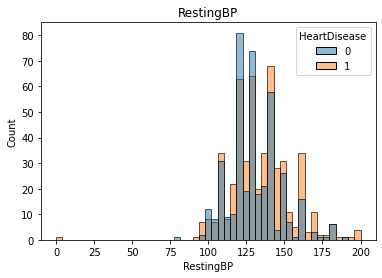

In [21]:
plt.figure()
sns.histplot(x = "RestingBP", data = heart_data, hue = "HeartDisease")
plt.title("RestingBP")

In [22]:
heart_data["Cholesterol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

Text(0.5, 1.0, 'Cholesterol')

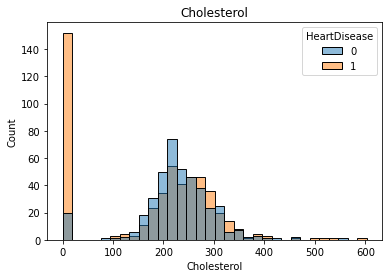

In [23]:
plt.figure()
sns.histplot(x = "Cholesterol", data = heart_data, hue = "HeartDisease")
plt.title("Cholesterol")

In [24]:
heart_data["FastingBS"].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'FastingBS')

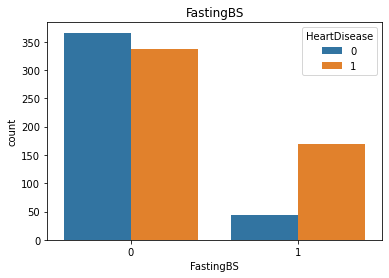

In [25]:
plt.figure()
sns.countplot(x = "FastingBS", data = heart_data, hue = "HeartDisease")
plt.title("FastingBS")

In [26]:
heart_data["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

Text(0.5, 1.0, 'RestingECG')

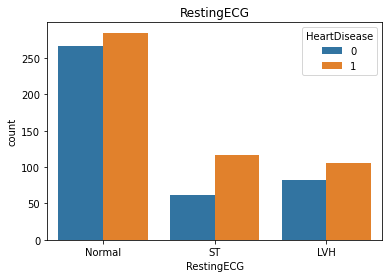

In [27]:
plt.figure()
sns.countplot(x = "RestingECG", data = heart_data, hue = "HeartDisease")
plt.title("RestingECG")

In [28]:
heart_data["MaxHR"].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202], dtype=int64)

Text(0.5, 1.0, 'MaxHR')

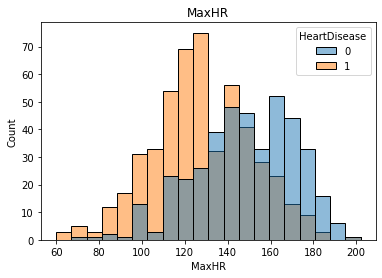

In [29]:
plt.figure()
sns.histplot(x = "MaxHR", data = heart_data, hue = "HeartDisease")
plt.title("MaxHR")

In [30]:
heart_data["Oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

Text(0.5, 1.0, 'Oldpeak')

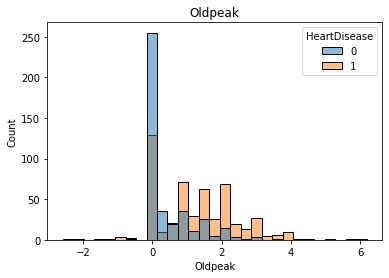

In [31]:
plt.figure()
sns.histplot(x = "Oldpeak", data = heart_data, hue = "HeartDisease")
plt.title("Oldpeak")

Text(0.5, 1.0, 'Heart Disease vs Age')

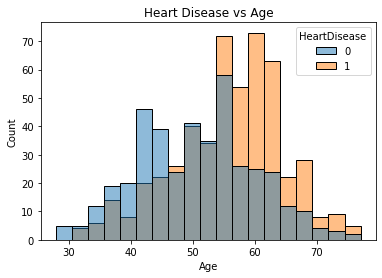

In [32]:
plt.figure()
sns.histplot(x = "Age", data = heart_data, hue = "HeartDisease")
plt.title("Heart Disease vs Age")

Text(0.5, 1.0, 'MaxHR vs Age')

<Figure size 432x288 with 0 Axes>

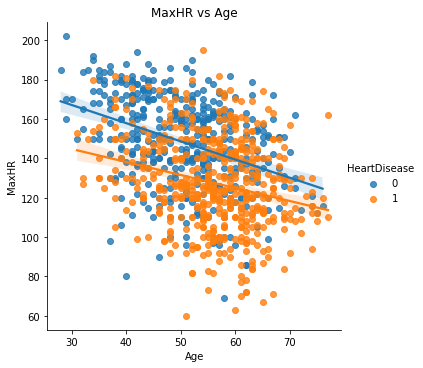

In [33]:
plt.figure()
sns.lmplot(x="Age", y="MaxHR", hue="HeartDisease", data=heart_data)
plt.title("MaxHR vs Age")

Text(0.5, 1.0, 'Oldpeak vs Age')

<Figure size 432x288 with 0 Axes>

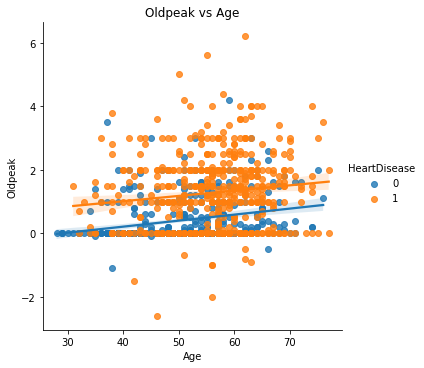

In [34]:
plt.figure()
sns.lmplot(x="Age", y="Oldpeak", hue="HeartDisease", data=heart_data)
plt.title("Oldpeak vs Age")

##Checking for Missing Values

In [35]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [36]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [37]:
# For Numerical Type
heart_data.select_dtypes(include=(['int64','float64'])).isna().sum()

Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64

In [38]:
# For Categorical Type
heart_data.select_dtypes(include=(['object'])).isna().sum()

Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

##Checking for Duplicates

In [39]:
heart_data.duplicated().sum()

0

In [40]:
heart_data.select_dtypes(include=(['object']))

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [45]:
# Get list of columns with categorical features
colum_cat = []
lis = list(heart_data.columns)
for i in lis:
    if heart_data[i].dtype == "object":
        colum_cat.append(i)

colum_cat

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [46]:
colum_cat = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in colum_cat:
    print('-------------------------')
    print(heart_data[i].value_counts())
    print('-------------------------')

-------------------------
M    725
F    193
Name: Sex, dtype: int64
-------------------------
-------------------------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
-------------------------
-------------------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
-------------------------
-------------------------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
-------------------------
-------------------------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
-------------------------


In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols_cat = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in cols_cat:
    heart_data[col] = le.fit_transform(heart_data[col])
    print(le.classes_)  

['F' 'M']
['ASY' 'ATA' 'NAP' 'TA']
['LVH' 'Normal' 'ST']
['N' 'Y']
['Down' 'Flat' 'Up']


##Set Up Features and Target

In [48]:
X = heart_data.drop(['HeartDisease'], axis = 1)
y = heart_data['HeartDisease']

In [49]:
y.shape

(918,)

##Split the data into train and test data

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

##Logistic Regression

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

In [52]:
y_pred_lr.shape

(184,)

In [53]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.24 %
